# Lab 2 -  Decision Trees
The following notebook takes you through implementing the decision tree algorithm. It involves data manipulation/visualisation, hyperparameter selection, recursion, and building a prediction model. We will use a binary classification problem: Breast cancer diagnosis.

## Marking and Submission

This lab exercise is marked, and contributes 10% to your final grade. For this lab exercise there are 6 questions for which you are expected to enter your own code, for 15 marks overall. Every place you have to add code is indicated by

`# **************************************************************** n marks`

with instructions above the code block.

Please submit your completed workbook on [https://you.cs.bath.ac.uk] before 2021-11-5 20:00 GMT. The workbook you submit must be an `.ipynb` file, which is saved into the directory you're running Jupyter; alternatively you can download it from the menu above using `File -> Download As -> Notebook (.ipynb)`. Remember to save your work regularly (Save and checkpoint in the File menu, the icon of a floppy disk, or Ctrl-S); the version you submit should have all code blocks showing the results (if any) of execution below them. The auto marker will provide feedback, though note that there will be mark reduction after a certain number of submissions. You do not need to include the dataset when submitting.

In [1]:
%matplotlib inline
import numpy as np

from sklearn import datasets as ds
from sklearn.decomposition import PCA
from sklearn import preprocessing

import matplotlib.pyplot as plt

## Import data
The first step of any machine learning problem is to load the data. In this tutorial you don't have to download any dataset since we are using a built-in dataset provided by the scikit learn package.

Note that the target variable, `y` is either `0` or `1`, where `0` means malignant and `1` means benign.

In [2]:
data_all = ds.load_breast_cancer()

x = data_all.data
y = data_all.target

y_names = data_all.target_names 

feature_names = data_all.feature_names

## Breast Cancer Wisconsin (Diagnostic) Database
A description of the dataset used is provided here.

Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - target class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of the UCI ML Breast Cancer Wisconsin (Diagnostic) dataset from https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass. They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

```
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/
```

### References
   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.


## Prepare/Split data
We provide the data preparation part. The bellow code block splits the data and the targets into training and test sets; 60% for training, 40% for test. This repartition is of course arbitrary, different percentages could have been chosen.

In [3]:
split = int(x.shape[0] * 0.6)

x_train = x[:split,:]
y_train = y[:split]

x_test = x[split:,:]
y_test = y[split:]

print('Training set size:', x_train.shape[0])
print('Test set size:', x_test.shape[0])

Training set size: 341
Test set size: 228


## Data visualisation

Since our data has a feature dimensionality of 30, it is difficult for us to visualise it. We visualize data by using a dimensionality reduction technique called Principal Component Analysis (PCA). 

Given an array in $\mathbb{R}^{N \times D}$ (a matrix of size $N$ by $D$ with real entries) with $N = 569$ and $D=30$ being the number of data points and the feature dimensionality, respectively. PCA will output an array in $\mathbb{R}^{N \times M}$, with $M < D$.

PCA will be covered in a future lecture. But for now, you can consider it as a way to reduce the dimensionality of our feature space.

In order to be able to visualise the data on a 2D plot, we choose $M = 2$ ($M = 3$ is also a possibility).

## 1. Looking at Data

Complete the code block below to plot the reduced data obtained using PCA (`x_reduced` contains the result of applying PCA). Use different colours and markers to distinguish between positive and negative samples.

It is interesting to see how the results havea  different visualisation without the scaling part. 

The results should look similar to the plot below (please note that this is a plot of another dataset):

<img src="pca_example_graph.png">

Hint: You will need to google the documentation for the `scatter()` and `legend()` methods of `matplotlib`.

Note: This dataset swaps the typical convention, so `y=0` means malignant and `y=1` means benign.

__(1 mark)__

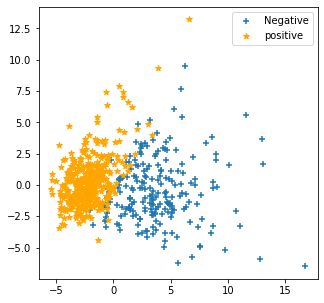

In [4]:
pca = PCA(n_components=2)
x_scaled = preprocessing.scale(x[:,:-1]) # We remove the indexing and make sure all the features are in N(0,1)
x_reduced = pca.fit_transform(x_scaled)
# x_reduced = pca.fit_transform(x[:,0:-1]) # Uncomment this to see the result without scaling

plt.figure(figsize=(5,5))
negative=plt.scatter(x_reduced[:,0][y==0],x_reduced[:,1][y==0],marker='+')
positive=plt.scatter(x_reduced[:,0][y==1],x_reduced[:,1][y==1],c='orange',marker='*')
plt.legend([negative,positive],['Negative','positive'])
# **************************************************************** 1 mark


## 2. Calculating Entropy

Complete the function `calculate_entropy(y)` in the code block bellow. The input is a column vector of target class values, and the output is its entropy (as described in the decision tree lecture).

`y` is a length `n` vector where `n` is the number of data points. It contains the class/category of each data point as an integer, i.e. `0` for the first class, `1` for the second class.
The return is a scalar.

Hints:
 * You may want to google the documentation for `numpy.unique()`,  paying particular attention to the `return_counts` keyword.
 * Beware `log(0)`.
 * Be careful about type - you may need to use `.astype(float)` to avoid integer division.

__(4 marks)__

In [5]:
def calculate_entropy(y):
    
    # **************************************************************** 4 marks
    count=np.array(np.unique(y,return_counts=True))
    p=count[1].astype(float)/((count[1].sum()).astype(float))
    
    entropy=(-1)*((np.log2(p)*p).sum())
    
    return entropy


print("The entropy of 'y' is: {:.4f}".format(calculate_entropy(y)))

The entropy of 'y' is: 0.9526


## 3. Doing the Splits

Use the function `calculate_entropy()` to complete the function `find_split(x, y)`.

`find_split(x, y)` takes as input:
 * The data matrix of features, `x` with shape `(n,d)`. `n` is the number of data points and `d` is the feature dimensionality. 
 * `y`, a column vector of size `n` containing the target value for each data point in `x`.

`find_split(x, y)` outputs 'best_split' which is a dictionary (see the last part of the below code) with the following keys and their corresponding values:

 * `'feature'`: An integer indexing the attribute/feature chosen to split upon.
 * `'split'`: The value/threshold of this feature to split at.
 * `'infogain'`: A scalar representing the amount of information gained by splitting this way.
 * `'left_indices'`: Indices of the exemplars that satisfy `x[feature_index]<=split`.
 * `'right_indices'`: Opposite set of indices to `left_indices`.

__(5 marks)__

In [6]:
def find_split(x, y):
    """Given a dataset and its target values, this finds the optimal combination
    of feature and split point that gives the maximum information gain."""
    
    # Need the starting entropy so we can measure improvement...
    start_entropy = calculate_entropy(y)
    
    # Best thus far, initialised to a dud that will be replaced immediately...
    best = {'infogain' : -np.inf}
    
    # Loop every possible split of every dimension...
    for i in range(x.shape[1]):
        for split in np.unique(x[:,i]):
            left_indices=np.array(np.where(x[:,i]<=split)[0])
            #print(left_indices)
            left_y=y[left_indices]
#             print(left_y.shape)
            n_l=left_y.shape[0]
            left_entropy=calculate_entropy(left_y)
            
            
            
            right_indices=np.array(np.where(x[:,i]>split)[0])
            #print(right_indices)
            right_y=y[right_indices]
#             print(right_y.shape)
            n_r=right_y.shape[0]
#             print(n_r)
            right_entropy=calculate_entropy(right_y)
            
            n=n_l+n_r
            infogain=start_entropy-((n_l/n)*left_entropy)-((n_r/n)*right_entropy)
            
            
            # **************************************************************** 5 marks
            
            if infogain > best['infogain']:
                best = {'feature' : i,
                        'split' : split,
                        'infogain' : infogain, 
                        'left_indices' : left_indices,
                        'right_indices' : right_indices}
    #print(best)
    return best
#find_split(x,y)

The function `find_split()` allows us to find the optimal feature and the best value to split the data into two chunks (on its own it is the _decision stump_ algorithm). Applying this to the original data set splits it into two new data sets. We can then repeat this on both of the new data sets to get four data sets, and so on. This recursion builds a decision tree. It needs a stopping condition, to prevent it dividing the data forever, here we will use two:
 * Maximum depth: The tree is limited to be no deeper than a provided limit.
 * Perfection: If a node contains only one class then it does not make sense to split it further.

We provide the function `build_tree(x, y, max_depth)` below to construct a tree. The inputs are: 

 * The data matrix of features, `x` in `R^None`. `n` is the number of data points and `d` is the feature dimensionality. 
 * `y`, a column vector of size `n` containing the target value for each data point in `x`.
 * The maximum depth of the tree, `max_depth`.

The output of this function is a dictionary. If it has generated a leaf node then the keys are:
 * `'leaf' : True`
 * `'class'` : The index of the class to assign to exemplars that land here.

If it has generated a split node then the keys are:
 * `'leaf' : False`
 * `'feature'`: The feature to apply the `split` to.
 * `'split'`: The split to test the exemplars `feature` with.
 * `'infogain'`: The information gain of this split.
 * `'left'` : The left subtree, for exemplars where `x[feature_index]<=split`
 * `'right'` : The right subtree, for exemplars where `x[feature_index]>split`

Note how this structure is compatable with the one returned by `find_split()` above.


In [7]:
def build_tree(x, y, max_depth = np.inf):
    # Check if either of the stopping conditions have been reached. If so generate a leaf node...
    if max_depth==1 or (y==y[0]).all():
        # Generate a leaf node...
        classes, counts = np.unique(y, return_counts=True)
        return {'leaf' : True, 'class' : classes[np.argmax(counts)]}
    
    else:
        move = find_split(x, y)
        
        left = build_tree(x[move['left_indices'],:], y[move['left_indices']], max_depth - 1)
        right = build_tree(x[move['right_indices'],:], y[move['right_indices']], max_depth - 1)
        
        return {'leaf' : False,
                'feature' : move['feature'],
                'split' : move['split'],
                'infogain' : move['infogain'],
                'left' : left,
                'right' : right}

After building the tree we should be able to predict the class of a sample. We do that by propagating the sample through the tree, i.e. we check all the splitting conditions until the sample falls in a leaf node, in which case the class of the leaf node is attributed to the sample.

We provide the recursive function `predict_one(tree, sample)` that takes as input the constructed tree, a sample in `R^d` and recursively propagates it through the branches of our tree. The output of this function is the class predicted for the sample.

In [8]:
def predict_one(tree, sample):
    """Does the prediction for a single data point"""
    if tree['leaf']:
        return tree['class']
    
    else:
        if sample[tree['feature']] <= tree['split']:
            return predict_one(tree['left'], sample)
        else:
            return predict_one(tree['right'], sample)


We further generalize the prediction function above to the case where we have a data matrix `R^None` representing many data points. the function `predict(tree, samples)` bellow takes as input the constructed tree and a data array then returns an array containing the predictions for all the samples in our input data array.

In [9]:
def predict(tree, samples):
    """Predicts class for every entry of a data matrix."""
    ret = np.empty(samples.shape[0], dtype=int)
    ret.fill(-1)
    indices = np.arange(samples.shape[0])
    
    def tranverse(node, indices):
        nonlocal samples
        nonlocal ret
        
        if node['leaf']:
            ret[indices] = node['class']
        
        else:
            going_left = samples[indices, node['feature']] <= node['split']
            left_indices = indices[going_left]
            right_indices = indices[np.logical_not(going_left)]
            
            if left_indices.shape[0] > 0:
                tranverse(node['left'], left_indices)
                
            if right_indices.shape[0] > 0:
                tranverse(node['right'], right_indices)
    
    tranverse(tree, indices)
    return ret

## 4. Accuracy:
Use the functions defined above to build a tree and report both its training and test accuracy.

__(2 marks)__

In [10]:
def evaluate(x_train, y_train, x_test, y_test, max_depth):
    
    # **************************************************************** 2 marks
    tree=build_tree(x_train,y_train,max_depth)
#     print(tree)
#     for k in tree.keys():
#         print('key===',k)
#         print('value====',tree[k])
        
    y_train_predict=predict(tree,x_train)
    train_acc=((y_train_predict==y_train).sum())/(y_train.shape[0])
    
    
    y_test_predict=predict(tree,x_test)
    
    test_acc=((y_test_predict==y_test).sum())/(y_test.shape[0])
    
    return train_acc, test_acc


train_acc, test_acc = evaluate(x_train, y_train, x_test, y_test, np.inf)
print('Train Accuracy: {:.2f}%'.format(train_acc*100))
print('Test Accuracy: {:.2f}%'.format(test_acc*100))

Train Accuracy: 100.00%
Test Accuracy: 89.91%


## 5. Optimal Tree Depth

Find the best `max_depth` parameter plus its corresponding training and test accuracies. A good range to test is `range(2,6)`.

__(2 marks)__

In [11]:
def find_best_max_depth(x_train, y_train, x_test, y_test):
    best_test_acc=-1
    
    # **************************************************************** 2 marks
    best=[]
    for max_depth in range(2,7):
        train_acc, test_acc=evaluate(x_train,y_train,x_test,y_test,max_depth)
        best.append([test_acc,train_acc,max_depth])
#     print(best)   
    best_test_acc,best_train_acc,best_max_depth=max(best)
    
    
    return best_max_depth, best_train_acc, best_test_acc


best_max_depth, best_train_acc, best_test_acc = find_best_max_depth(x_train, y_train, x_test, y_test)
print('The best max_depth is {}, and the corresponding training and test accuracies are {:.2f}% and {:.2f}% respectively.'.format(best_max_depth,best_train_acc*100,best_test_acc*100))

The best max_depth is 4, and the corresponding training and test accuracies are 97.36% and 91.67% respectively.


## 6. Looking at Trees

Write a recursive function that prints out a tree, and use it to print the <b>best</b> tree learned.

Example:

```
    [x22 <=0.296]

        [x27 <=-0.058]

          [x13 <=0.187]

           [x21 <=1.246]
                predict 1
                
           [x21 >1.246]
                predict 0
                
          [x13 >0.187]

           [x0 <=0.160]
                predict 1
                
           [x0 >0.160]
                predict 0
                
        [x27 >-0.058]

          [x27 <=0.690]

           [x21 <=0.263]
            predict 1
            
           [x21 >0.263]
            predict 0
            
          [x27 >0.690]
            predict 0
            
    [x22 >0.296]

    predict 0
```

The conditions with the same tree depth must be indented the same amount. This function should have as input the tree learned, and a scalar `indent` that is used to measure how far to indent at the current recursion level.

__(1 mark)__

In [17]:
def print_tree(tree, indent = 0):
    
    # **************************************************************** 1 mark
    def print_tree(tree,indent):
        if(tree['left']['leaf']==True):
            print("{0}[x{1} <= {2}]".format('   '*indent,tree['feature'],tree['split']))

            print('{0}predict {1}'.format('     '*(indent),tree['left']['class']))
            print()
            print()        

        if(tree['right']['leaf']==True):
            print('{0}[x{1} > {2}]'.format('   '*indent,tree['feature'],tree['split']))

            print('{0}predict {1}'.format('     '*(indent),tree['right']['class']))
            print()
            print()        


        if(tree['left']['leaf']!=True):
            print("{0}[x{1} <= {2}]".format('   '*indent,tree['feature'],tree['split']))
            print()
            print()        
            print_tree(tree['left'],indent+1)



        if(tree['right']['leaf']!=True):

            print('{0}[x{1} > {2}]'.format('   '*indent,tree['feature'],tree['split']))
            print()
            print()
            print_tree(tree['right'],indent+1)

    
    
    
    
best_max_depth=find_best_max_depth(x_train, y_train, x_test, y_test)[0]
tree = build_tree(x_train, y_train, best_max_depth)
print(tree)
print_tree(tree)

{'leaf': False, 'feature': 22, 'split': 105.0, 'infogain': 0.6180372496508715, 'left': {'leaf': False, 'feature': 24, 'split': 0.1733, 'infogain': 0.14260717506536755, 'left': {'leaf': False, 'feature': 21, 'split': 23.31, 'infogain': 0.046686955553979476, 'left': {'leaf': True, 'class': 1}, 'right': {'leaf': True, 'class': 1}}, 'right': {'leaf': True, 'class': 0}}, 'right': {'leaf': False, 'feature': 22, 'split': 114.3, 'infogain': 0.15946418150236125, 'left': {'leaf': False, 'feature': 1, 'split': 19.65, 'infogain': 0.61751117056093, 'left': {'leaf': True, 'class': 1}, 'right': {'leaf': True, 'class': 0}}, 'right': {'leaf': False, 'feature': 7, 'split': 0.02771, 'infogain': 0.06722154475830686, 'left': {'leaf': True, 'class': 1}, 'right': {'leaf': True, 'class': 0}}}}
